In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import scipy.stats as sp
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.stats import t
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from statistics import mean
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Electric_Car_Data1.csv')

In [3]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
92,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
93,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
94,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [4]:
#data cleaning

In [5]:
#deleting RapidCharge column
del df['RapidCharge']

In [6]:
#deleting PlugType column
del df['PlugType']

In [7]:
#deleting Seats column
del df['Seats']

In [8]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PowerTrain,BodyStyle,Segment,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,AWD,Sedan,D,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,RWD,Hatchback,C,30000
2,Polestar,2,4.7,210,400,181,620,AWD,Liftback,D,56440
3,BMW,iX3,6.8,180,360,206,560,RWD,SUV,D,68040
4,Honda,e,9.5,145,170,168,190,RWD,Hatchback,B,32997
...,...,...,...,...,...,...,...,...,...,...,...
91,Nissan,Ariya 63kWh,7.5,160,330,191,440,FWD,Hatchback,C,45000
92,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,AWD,SUV,E,96050
93,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,AWD,Hatchback,C,50000
94,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,AWD,Hatchback,C,65000


In [9]:
#checking null value
df.isnull().any()

Brand              False
Model              False
AccelSec           False
TopSpeed_KmH       False
Range_Km           False
Efficiency_WhKm    False
FastCharge_KmH     False
PowerTrain         False
BodyStyle          False
Segment            False
PriceEuro          False
dtype: bool

In [10]:
#checking duplicate data
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
91    False
92    False
93    False
94    False
95    False
Length: 96, dtype: bool

In [11]:
#checking data types
df.dtypes

Brand               object
Model               object
AccelSec           float64
TopSpeed_KmH         int64
Range_Km             int64
Efficiency_WhKm      int64
FastCharge_KmH      object
PowerTrain          object
BodyStyle           object
Segment             object
PriceEuro            int64
dtype: object

In [12]:
#performing statistics

In [13]:
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PowerTrain,BodyStyle,Segment,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,AWD,Sedan,D,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,RWD,Hatchback,C,30000
2,Polestar,2,4.7,210,400,181,620,AWD,Liftback,D,56440
3,BMW,iX3,6.8,180,360,206,560,RWD,SUV,D,68040
4,Honda,e,9.5,145,170,168,190,RWD,Hatchback,B,32997


In [14]:
df.tail()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,PowerTrain,BodyStyle,Segment,PriceEuro
91,Nissan,Ariya 63kWh,7.5,160,330,191,440,FWD,Hatchback,C,45000
92,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,AWD,SUV,E,96050
93,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,AWD,Hatchback,C,50000
94,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,AWD,Hatchback,C,65000
95,Byton,M-Byte 95 kWh 2WD,7.5,190,400,238,480,AWD,SUV,E,62000


In [15]:
df.shape

(96, 11)

In [16]:
#calculating min value

In [17]:
min_value = df[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','PriceEuro']].min()
min_value

AccelSec               2.5
TopSpeed_KmH         130.0
Range_Km              95.0
Efficiency_WhKm      104.0
PriceEuro          20129.0
dtype: float64

In [18]:
#calculating max value

In [19]:
max_value = df[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm', 'PriceEuro']].max()
max_value

AccelSec               12.7
TopSpeed_KmH          261.0
Range_Km              610.0
Efficiency_WhKm       270.0
PriceEuro          180781.0
dtype: float64

In [25]:
#calculating median value

In [41]:
median_value = df[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','PriceEuro']].median()
median_value

AccelSec               7.3
TopSpeed_KmH         160.0
Range_Km             340.0
Efficiency_WhKm      179.5
PriceEuro          45000.0
dtype: float64

In [43]:
#calculating mean value

In [45]:
mean_value = df[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm', 'PriceEuro']].mean()
mean_value

AccelSec               7.273958
TopSpeed_KmH         177.854167
Range_Km             329.635417
Efficiency_WhKm      185.697917
PriceEuro          54340.770833
dtype: float64

In [47]:
#calculating standard deviation

In [49]:
std_value = df[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','PriceEuro']].std()
std_value

AccelSec               2.509948
TopSpeed_KmH          37.280439
Range_Km             101.185720
Efficiency_WhKm       26.132504
PriceEuro          31080.107506
dtype: float64

In [51]:
#calculating correlation matrix

In [53]:
corr_matrix = df[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','PriceEuro']].corr()
corr_matrix

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PriceEuro
AccelSec,1.000000,-0.895901,-0.713609,-0.522784,-0.716160
TopSpeed_KmH,-0.895901,1.000000,0.669139,0.467972,0.787721
Range_Km,-0.713609,0.669139,1.000000,0.256305,0.604705
Efficiency_WhKm,-0.522784,0.467972,0.256305,1.000000,0.467145
PriceEuro,-0.716160,0.787721,0.604705,0.467145,1.000000


In [55]:
#calculating correlation pearson

In [57]:
corr_pearson = df[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','PriceEuro']].corr('pearson')
corr_pearson

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PriceEuro
AccelSec,1.000000,-0.895901,-0.713609,-0.522784,-0.716160
TopSpeed_KmH,-0.895901,1.000000,0.669139,0.467972,0.787721
Range_Km,-0.713609,0.669139,1.000000,0.256305,0.604705
Efficiency_WhKm,-0.522784,0.467972,0.256305,1.000000,0.467145
PriceEuro,-0.716160,0.787721,0.604705,0.467145,1.000000


In [59]:
#calculating correlation kendall

In [61]:
corr_kendall = df[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','PriceEuro']].corr('kendall')
corr_kendall

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PriceEuro
AccelSec,1.000000,-0.764597,-0.524491,-0.419665,-0.714036
TopSpeed_KmH,-0.764597,1.000000,0.576227,0.446292,0.747268
Range_Km,-0.524491,0.576227,1.000000,0.287662,0.560345
Efficiency_WhKm,-0.419665,0.446292,0.287662,1.000000,0.531896
PriceEuro,-0.714036,0.747268,0.560345,0.531896,1.000000


In [63]:
#calculating the kurtosis

In [65]:
kurtosis = df[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','PriceEuro']].kurtosis()
kurtosis 

AccelSec          -0.531764
TopSpeed_KmH      -0.242124
Range_Km           0.053925
Efficiency_WhKm    1.336878
PriceEuro          3.815802
dtype: float64

In [67]:
#calculating the skewness

In [69]:
skew = df[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','PriceEuro']].skew()
skew

AccelSec           0.139713
TopSpeed_KmH       0.888411
Range_Km          -0.115880
Efficiency_WhKm    0.720367
PriceEuro          1.868532
dtype: float64

In [71]:
#summarizing statistics of data using describe() function

In [73]:
descibed_data = df[['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','PriceEuro']].describe()
descibed_data

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,PriceEuro
count,96.000000,96.000000,96.000000,96.000000,96.000000
mean,7.273958,177.854167,329.635417,185.697917,54340.770833
std,2.509948,37.280439,101.185720,26.132504,31080.107506
min,2.500000,130.000000,95.000000,104.000000,20129.000000
25%,5.400000,150.000000,250.000000,167.750000,34390.250000
50%,7.300000,160.000000,340.000000,179.500000,45000.000000
75%,9.000000,200.000000,400.000000,197.250000,64250.000000
max,12.700000,261.000000,610.000000,270.000000,180781.000000


In [75]:
# performing group by 

In [77]:
group = df.groupby('Brand')
groupdf = group.mean('Brand')

In [79]:
# relational graph

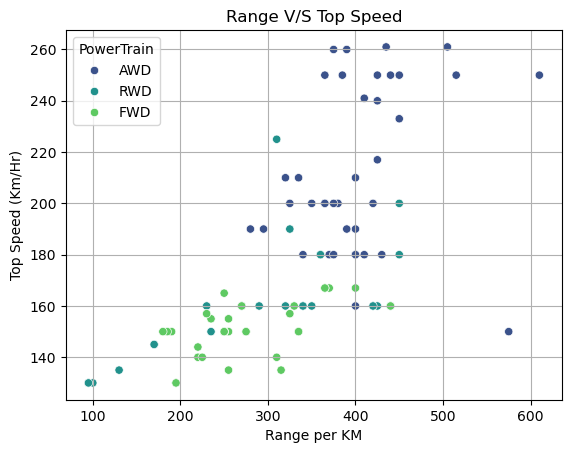

In [81]:
def scatter_plot():
    """
    Creates a scatter plot showing the relationship between 'Range_Km' and 'TopSpeed_KmH'.
    The plot is colored based on the hue; 'PowerTrain' column and uses the 'viridis' color palette.
    
    The plot includes the following:
    - Title: 'Range V/S Top Speed'
    - X-axis labeled as 'Range per KM'
    - Y-axis labeled as 'Top Speed (Km/Hr)'
    - Custom grid, axis ticks, and saved to 'scatter_plot.png'.
    
    The plot is displayed using plt.show() and saved as png image file.
    """
    sns.scatterplot(x='Range_Km', y='TopSpeed_KmH', data=df, hue='PowerTrain', palette='viridis') 
    plt.title('Range V/S Top Speed') 
    plt.xlabel('Range per KM') 
    plt.ylabel('Top Speed (Km/Hr)')
    plt.xticks() 
    plt.yticks() 
    plt.grid(True)
    plt.savefig('scatter_plot.png')
    plt.show()

scatter_plot()

In [82]:
#Categorical graph

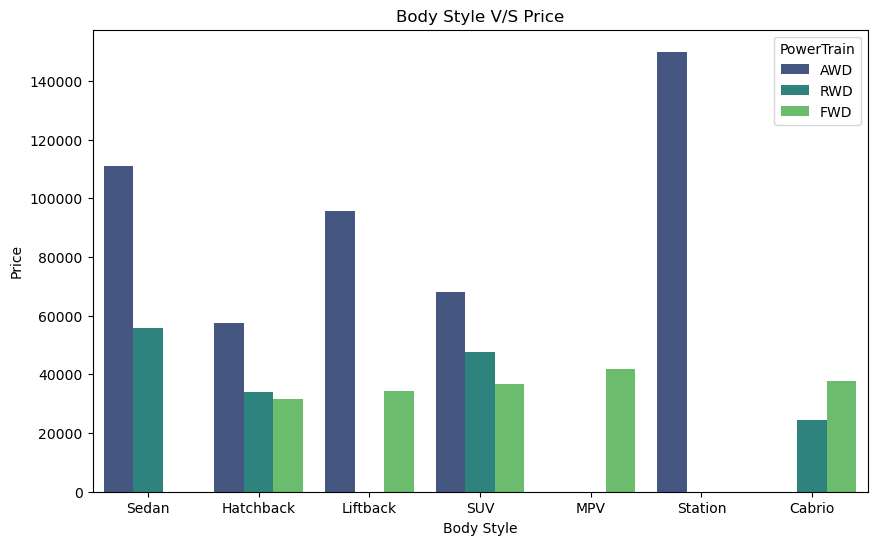

In [85]:
def bar_plot():
    """
    Creates a bar plot showing the relationship between 'BodyStyle' and 'PriceEuro'.
    The plot is segmented by the 'PowerTrain' column and uses the 'viridis' color palette.
    
    The plot includes the following:
    - Title: 'Body Style V/S Price'
    - X-axis labeled as 'Body Style'
    - Y-axis labeled as 'Price'
    - No confidence intervals (ci=None).
    - The plot is saved to 'bar_plot.png' and displayed using plt.show().
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x='BodyStyle', y='PriceEuro', hue='PowerTrain', ci=None, data=df, palette='viridis')
    plt.xlabel('Body Style') 
    plt.ylabel('Price') 
    plt.title('Body Style V/S Price') 
    plt.savefig('bar_plot.png')
    plt.show()

bar_plot()

In [87]:
#statistical graph

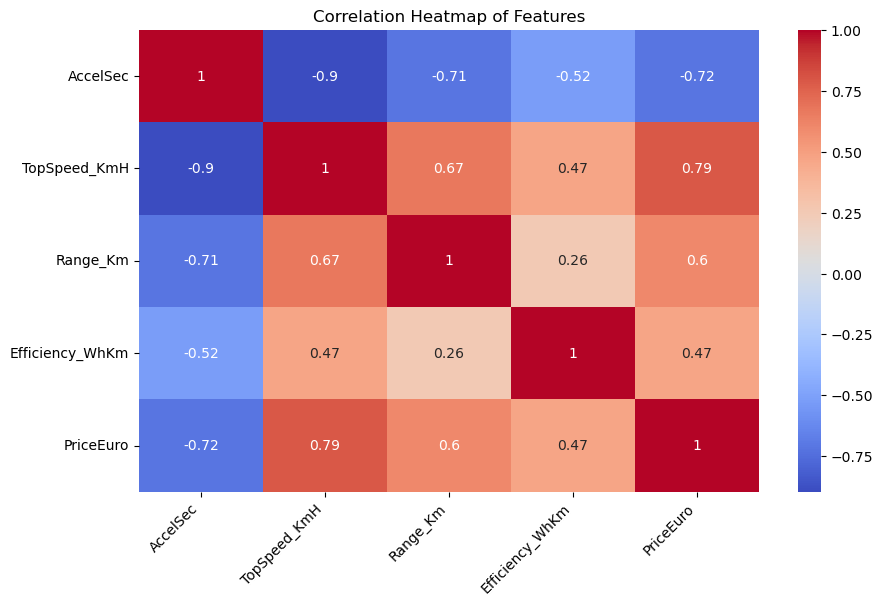

In [89]:
def heatmap_plot():
    """
    Creates a heatmap to visualize the correlation matrix of selected features like 'AccelSec', 'TopSpeed_KmH', 
    'Range_Km', 'Efficiency_WhKm', and'PriceEuro'.
    
    The plot includes the following:
    - A color map of 'coolwarm' to represent the correlation values.
    - The correlations are annotated in each cell.
    - The plot title is 'Correlation Heatmap of Features'.
    - X-axis labels are rotated by 45 degrees for better readability.
    - Y-axis labels are displayed without rotation.
    - The plot is saved to 'heatmap_plot.png' and displayed using plt.show().
    """
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'PriceEuro']].corr(), 
                cmap='coolwarm', annot=True)
    plt.title('Correlation Heatmap of Features') 
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0) 
    plt.savefig('heatmap_plot.png')
    plt.show()

heatmap_plot()

In [186]:
#fitting plots 

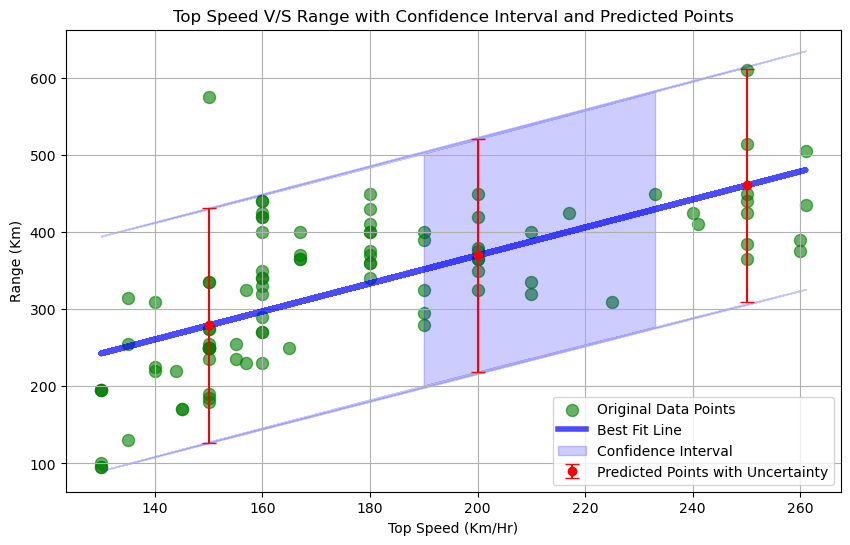

In [92]:
def best_fit_line(top_speed, car_range):
    """
    This function calculates the best fit line for the relationship between top speed and car range,
    along with prediction intervals and residuals for future predictions.

    Args:
    top_speed: The independent variable, top speed values.
    car_range: Electric car range values.
    confidence_level: The confidence level for the prediction intervals.

    Returns:
    tuple: 
        - slope (float): The slope of the best fit line.
        - y_intercept (float): The y-intercept of the best fit line.
        - regression_line (ndarray): The predicted car range values based on the regression.
        - prediction_interval (ndarray): The prediction intervals for the given top speed values.
        - residuals (ndarray): The residuals of the regression.
        - standard_error (float): The standard error of the regression model.
        - t_value (float): The t-distribution critical value for the given confidence level.
    """
    
    # Calculating the slope and y-intercept for the best fit line
    slope = (((np.mean(top_speed) * np.mean(car_range)) - np.mean(top_speed * car_range)) / ((np.mean(top_speed) * np.mean(top_speed)) - np.mean(top_speed * top_speed)))
    y_intercept = np.mean(car_range) - slope * np.mean(top_speed)
    return slope, y_intercept

# Loading selected data 
top_speed = df['TopSpeed_KmH'].values.reshape(-1, 1)
car_range = df['Range_Km'].values

# Creating linear regression object
speed_range = linear_model.LinearRegression()

# Using the training sets
speed_range.fit(top_speed, car_range)

# Getting the regression line
regression_line = speed_range.predict(top_speed)

# Making predictions uncertainties
Predicted_top_speed = np.array([150, 200, 250]).reshape(-1, 1)
Predicted_car_range = speed_range.predict(Predicted_top_speed)

# Calculating residuals and standard error
residuals = car_range - regression_line
squared_residuals = residuals ** 2
standard_error = np.sqrt(np.sum(squared_residuals) / (len(top_speed) - 2))

# working with confidence interval ( by using t-distribution)
confidence_level = 0.95
t_value = t.ppf(1 - (1 - confidence_level) / 2, df=len(top_speed) - 2)

# Prediction interval
prediction_interval = t_value * standard_error * np.sqrt(1 + 1/len(top_speed) + (top_speed - np.mean(top_speed))**2 / np.sum((top_speed - np.mean(top_speed))**2))

# Plotting the data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(top_speed, car_range, label='Original Data Points', alpha=0.6, color='green', s=75)
plt.plot(top_speed, regression_line, label='Best Fit Line', color='blue', linewidth=4, alpha=0.7)

# checking prediction_interval
prediction_interval = prediction_interval.flatten()

# Plotting confidence interval 
plt.fill_between(top_speed.flatten(), regression_line.flatten() - prediction_interval, regression_line.flatten() + prediction_interval, color='blue', alpha=0.2, label='Confidence Interval')

# Plotting predicted points with error bars
plt.errorbar(Predicted_top_speed.flatten(), Predicted_car_range, yerr=prediction_interval[:len(Predicted_top_speed)], fmt='o', color='red', label='Predicted Points with Uncertainty', capsize=5)

# Adding Labels and grid
plt.title('Top Speed V/S Range with Confidence Interval and Predicted Points')
plt.xlabel('Top Speed (Km/Hr)')
plt.ylabel('Range (Km)')
plt.grid(True)
plt.legend()
# Save the plot
plt.savefig('fitting_line_with_confidence_interval.png')
plt.show()

In [93]:
#elbow method for clustering

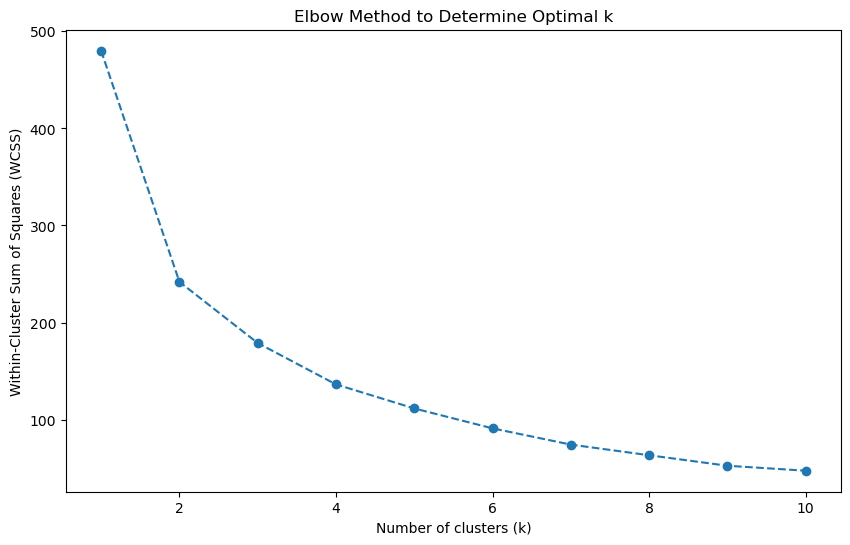

<Figure size 800x600 with 0 Axes>

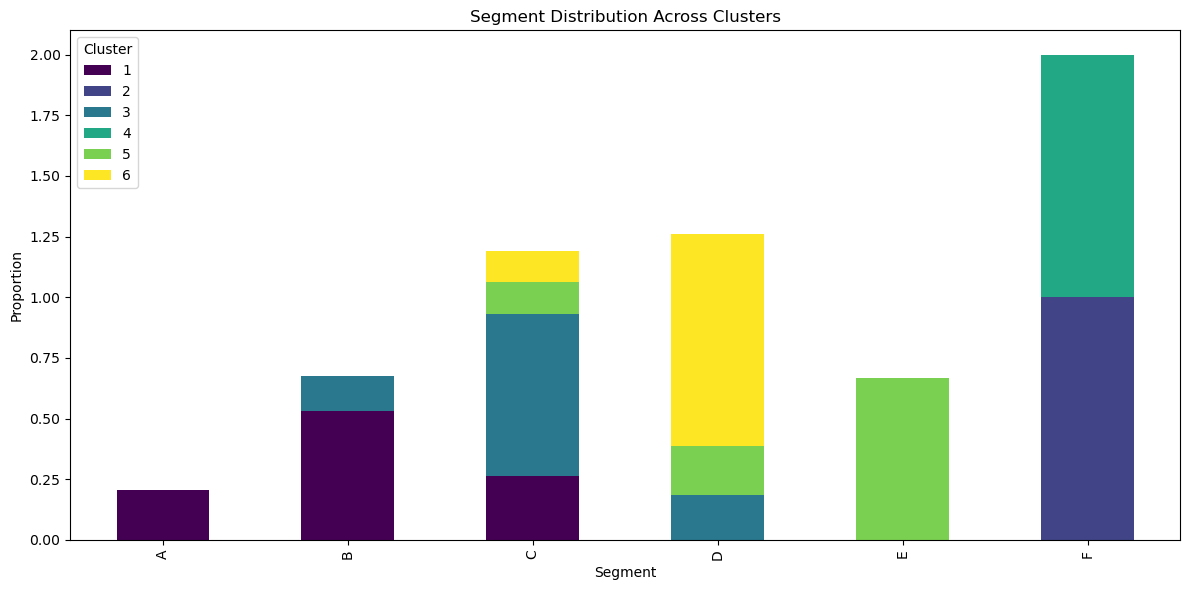

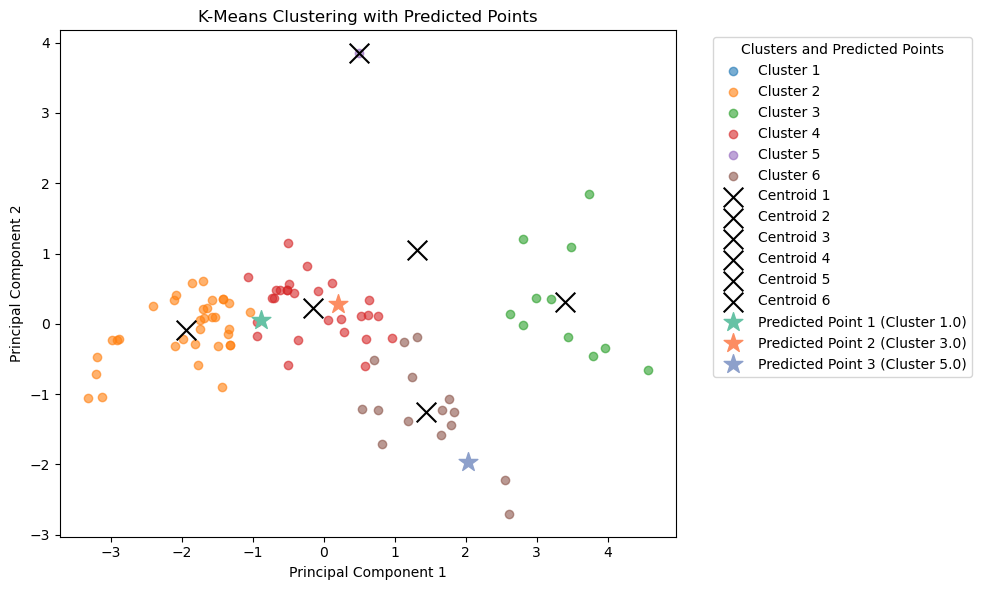

In [94]:
# Selecting relevant features for clustering
features_data = df[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 
               'Efficiency_WhKm', 'PriceEuro']]

# Normalizing the features
scaler = StandardScaler()
features_data_scaled = scaler.fit_transform(features_data)

# Performing Elbow Method to find optimal number of clusters
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

# Performing K-means clustering with optimal k = 6
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(features_data_scaled)

# Adding cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_ + 1

# Performing Back-scale centroids for interpretation
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

# Performing Backtest using Segment 
cluster_segment = df.groupby(['Cluster', 'Segment']).size().unstack(fill_value=0)

# Normalizing counts for better comparison
cluster_segment_normalized = cluster_segment.div(cluster_segment.sum(axis=1), axis=0)

# Visualizing the distribution
plt.figure(figsize=(8, 6))
cluster_segment_normalized.T.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis')
plt.title("Segment Distribution Across Clusters")
plt.xlabel("Segment")
plt.ylabel("Proportion")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig('segment_distribution')
plt.show()

# Using PCA for dimensionality reduction
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_data_scaled)

# Visualizing clusters
plt.figure(figsize=(10, 6))
colors = sns.color_palette("tab10", n_colors=optimal_k)
for i in range(optimal_k):
    cluster_data = features_pca[df['Cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                label=f"Cluster {i+1}", color=colors[i], alpha=0.6)

# Plotting centroids (PCA-reduced)
centroids_pca = pca.transform(centroids_scaled)
for idx, (x, y) in enumerate(centroids_pca):
    plt.scatter(x, y, color='black', marker='x', s=200, label=f"Centroid {idx+1}")

# Predicting the cluster for new guess data
predicted_data = pd.DataFrame({
    'AccelSec': [3.5, 6.2, 10.0],
    'TopSpeed_KmH': [150, 180, 233],
    'Range_Km': [170, 350, 400],
    'Efficiency_WhKm': [161, 181, 258],
    'PriceEuro': [35000, 50000, 96050]
})

# Normalizing the new data (predicted points) using the same scaler
predicted_data_scaled = scaler.transform(predicted_data)

# Predicting the clusters for the new data points
predicted_clusters = kmeans.predict(predicted_data_scaled)

# Adding predicted clusters to the new data
predicted_data['Predicted_Cluster'] = predicted_clusters

# Plottin predicted data points with their cluster labels
predicted_data_pca = pca.transform(predicted_data_scaled)
predicted_data_colors = sns.color_palette("Set2", n_colors=len(predicted_data))  # Colors for predicted points

for idx, (x, y) in enumerate(predicted_data_pca):
    predicted_cluster = predicted_data.iloc[idx]['Predicted_Cluster'] + 1
    plt.scatter(x, y, color=predicted_data_colors[idx], marker='*', s=200, 
                label=f"Predicted Point {idx + 1} (Cluster {predicted_cluster})")

# Adding labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with Predicted Points')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title="Clusters and Predicted Points")
plt.tight_layout()
plt.savefig('final_cluster_pp.png')
plt.show()